# Breast Cancer Diagnostic Prediction

In [6]:
#import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
import xgboost
import math
from sklearn import metrics

## Data Extraction

In [7]:
df = pd.read_csv('/content/breast_cancer_refined.csv')

In [8]:
df.shape

(286, 13)

In [9]:
df.head()

,Start Age,End Age,menopause,Start tumor size,End tumor size,Start_env_nodes,end_env_nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class
0,40,49,premeno,15,19,0,2,yes,3,right,left_up,no,recurrence-events
1,50,59,ge40,15,19,0,2,no,1,right,central,no,no-recurrence-events
2,50,59,ge40,35,39,0,2,no,2,left,left_low,no,recurrence-events
3,40,49,premeno,35,39,0,2,yes,3,right,left_low,yes,no-recurrence-events
4,40,49,premeno,30,34,3,5,yes,2,left,right_up,no,recurrence-events


In [10]:
#rename field
df = df.rename(columns = {'node-caps' : 'node_caps', 'breast-quad' : 'breast_quad'})
df.head()

,Start Age,End Age,menopause,Start tumor size,End tumor size,Start_env_nodes,end_env_nodes,node_caps,deg-malig,breast,breast_quad,irradiat,Class
0,40,49,premeno,15,19,0,2,yes,3,right,left_up,no,recurrence-events
1,50,59,ge40,15,19,0,2,no,1,right,central,no,no-recurrence-events
2,50,59,ge40,35,39,0,2,no,2,left,left_low,no,recurrence-events
3,40,49,premeno,35,39,0,2,yes,3,right,left_low,yes,no-recurrence-events
4,40,49,premeno,30,34,3,5,yes,2,left,right_up,no,recurrence-events


In [11]:
df.describe()

,Start Age,End Age,Start tumor size,End tumor size,Start_env_nodes,end_env_nodes,deg-malig
count,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000
mean,46.643357,55.643357,24.405594,28.405594,1.573427,3.573427,2.048951
std,10.118183,10.118183,10.529649,10.529649,3.451904,3.451904,0.738217
min,20.000000,29.000000,0.000000,4.000000,0.000000,2.000000,1.000000
25%,40.000000,49.000000,20.000000,24.000000,0.000000,2.000000,2.000000
50%,50.000000,59.000000,25.000000,29.000000,0.000000,2.000000,2.000000
75%,50.000000,59.000000,30.000000,34.000000,3.000000,5.000000,3.000000
max,70.000000,79.000000,50.000000,54.000000,24.000000,26.000000,3.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Start Age         286 non-null    int64 
 1   End Age           286 non-null    int64 
 2   menopause         286 non-null    object
 3   Start tumor size  286 non-null    int64 
 4   End tumor size    286 non-null    int64 
 5   Start_env_nodes   286 non-null    int64 
 6   end_env_nodes     286 non-null    int64 
 7   node_caps         278 non-null    object
 8   deg-malig         286 non-null    int64 
 9   breast            286 non-null    object
 10  breast_quad       285 non-null    object
 11  irradiat          286 non-null    object
 12  Class             286 non-null    object
dtypes: int64(7), object(6)
memory usage: 29.2+ KB


In [ ]:
#handling missing value
df.dropna(inplace = True)

In [13]:
#handling categorical variable
df['menopause'] = df['menopause'].astype('category')
df['node_caps'] = df['node_caps'].astype('category')
df['breast'] = df['breast'].astype('category')
df['breast_quad'] = df['breast_quad'].astype('category')
df['irradiat'] = df['irradiat'].astype('category')
df['Class'] = df['Class'].astype('category')
print(df.dtypes)

Start Age              int64
End Age                int64
menopause           category
Start tumor size       int64
End tumor size         int64
Start_env_nodes        int64
end_env_nodes          int64
node_caps           category
deg-malig              int64
breast              category
breast_quad         category
irradiat            category
Class               category
dtype: object


In [14]:
#handling categorical data
df['menopause'] = df['menopause'].cat.codes
df['node_caps'] = df['node_caps'].cat.codes
df['breast'] = df['breast'].cat.codes
df['breast_quad'] = df['breast_quad'].cat.codes
df['irradiat'] = df['irradiat'].cat.codes
df['Class'] = df['Class'].cat.codes
df.head()

,Start Age,End Age,menopause,Start tumor size,End tumor size,Start_env_nodes,end_env_nodes,node_caps,deg-malig,breast,breast_quad,irradiat,Class
0,40,49,2,15,19,0,2,1,3,1,2,0,1
1,50,59,0,15,19,0,2,0,1,1,0,0,0
2,50,59,0,35,39,0,2,0,2,0,1,0,1
3,40,49,2,35,39,0,2,1,3,1,1,1,0
4,40,49,2,30,34,3,5,1,2,0,4,0,1


In [15]:
#split data
X = df.drop('Class', axis = 1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(200, 12)
(200,)
(86, 12)
(86,)


## Classification Model

In [16]:
#prepare models
classifiers = [
    KNeighborsClassifier(n_neighbors = 5),
    SVC(kernel = 'linear', gamma = 'auto', C = 5, probability = True),
    LinearSVC(),
    DecisionTreeClassifier(max_depth = 3),
    RandomForestClassifier(random_state = 1, max_features = 'sqrt', n_jobs = 1, verbose = 1),
    XGBClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]

In [20]:
#report models
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns = log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    print("=" * 30)
    print(name)

    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))

    train_predictions = clf.predict(X_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    print("\n")

    log_entry = pd.DataFrame([[name, acc * 100, ll]], columns = log_cols)
    log = pd.concat([log, log_entry], ignore_index=True)

print("=" * 30)

KNeighborsClassifier
Accuracy: 62.7907%
Log Loss: 13.411591958741269


SVC
Accuracy: 65.1163%
Log Loss: 12.573367461319938


LinearSVC
Accuracy: 69.7674%
Log Loss: 10.896918466477278


DecisionTreeClassifier
Accuracy: 70.9302%
Log Loss: 10.477806217766615




/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


RandomForestClassifier
Accuracy: 70.9302%
Log Loss: 10.477806217766613


XGBClassifier
Accuracy: 69.7674%
Log Loss: 10.89691846647728


AdaBoostClassifier
Accuracy: 65.1163%
Log Loss: 12.573367461319938


GradientBoostingClassifier
Accuracy: 74.4186%
Log Loss: 9.22046947163462


GaussianNB
Accuracy: 69.7674%
Log Loss: 10.89691846647728


LinearDiscriminantAnalysis
Accuracy: 70.9302%
Log Loss: 10.477806217766615


QuadraticDiscriminantAnalysis
Accuracy: 59.3023%
Log Loss: 14.668928704873263




/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


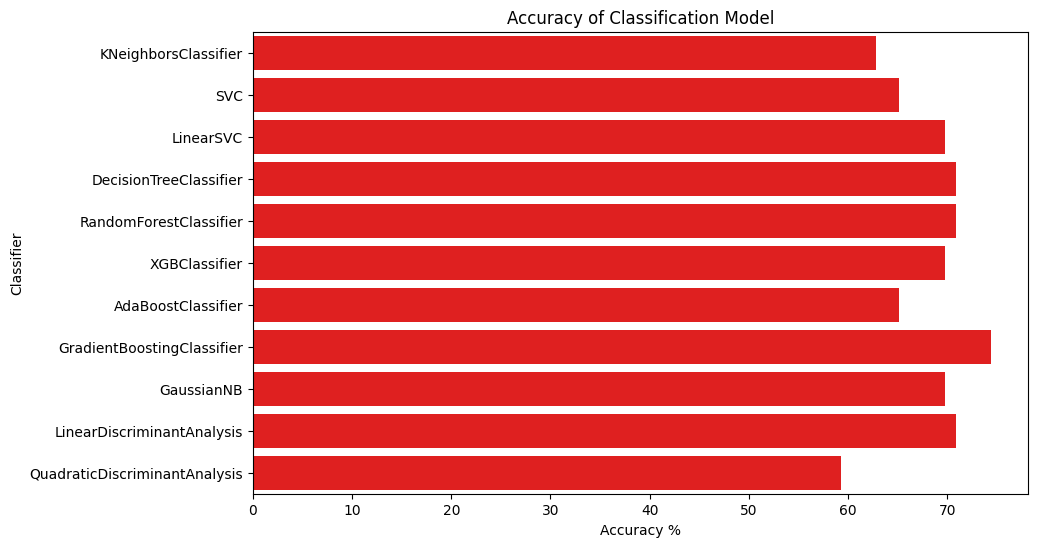

In [22]:
#visualize accuracy models
plt.figure(figsize = (10,6))
sns.set_color_codes("muted")
sns.barplot(x = 'Accuracy', y = 'Classifier', data = log, color = "red")
plt.xlabel('Accuracy %')
plt.title('Accuracy of Classification Model')
plt.show()
sns.set_color_codes("muted")
plt.show()

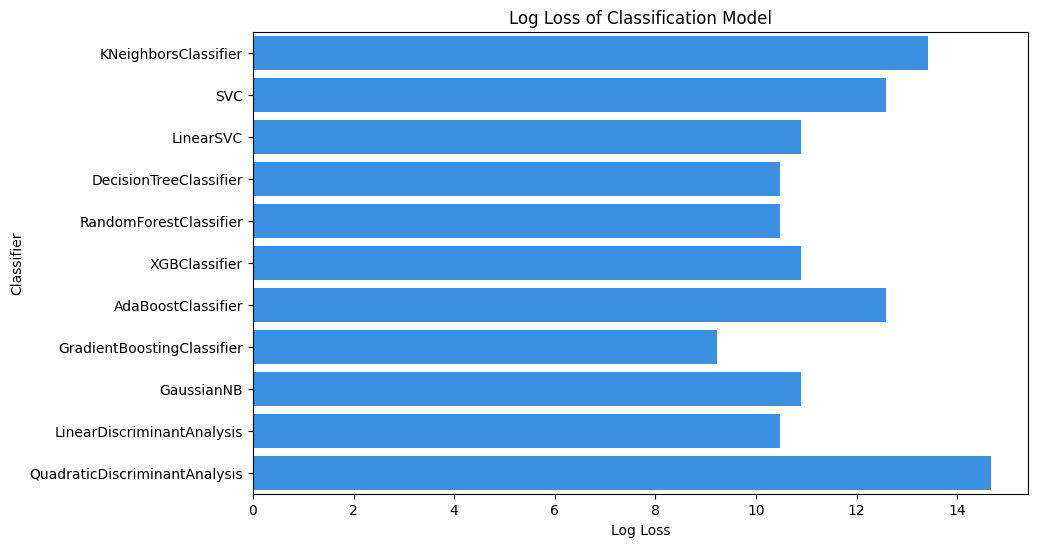

In [24]:
#visualize log loss models
plt.figure(figsize = (10,6))
sns.barplot(x = 'Log Loss', y = 'Classifier', data = log, color = "dodgerblue")
plt.xlabel('Log Loss')
plt.title('Log Loss of Classification Model')
plt.show()

### Linear Discriminant Analysis Model is the best score result

In [25]:
#build model
lda = LinearDiscriminantAnalysis()
%time lda.fit(X_train, y_train)
lda.score(X_test, y_test)

CPU times: user 7.15 ms, sys: 5 µs, total: 7.16 ms
Wall time: 7.09 ms


0.7093023255813954

In [26]:
#prediction
y_pred = lda.predict(X_test)
print(y_pred)

[1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0
 0 0 0 1 0 0 0 0 0 0 0 0]


In [27]:
#report of MSE & RMSE
mse = metrics.mean_squared_error(y_test, y_pred)
print('MSE: '+ str(mse))
rmse = math.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('RMSE: '+ str(rmse))

MSE: 0.29069767441860467
RMSE: 0.5391638660171921


[[51  3]
 [22 10]]


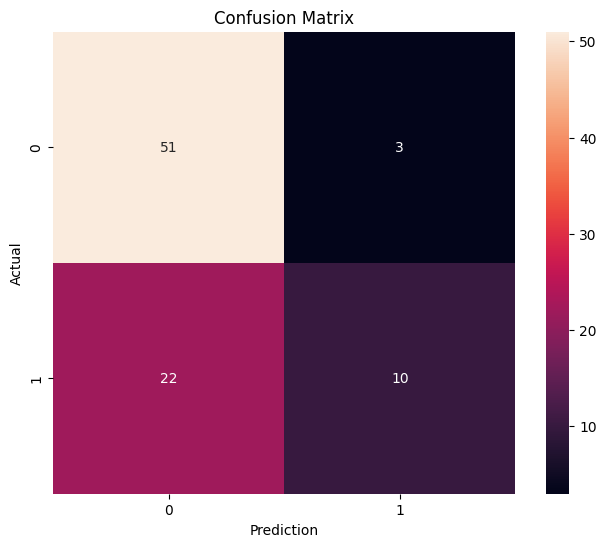

In [28]:
#confusion matrix
matrix = metrics.confusion_matrix(y_test, y_pred)
print(matrix)

#heatmap matrix
plt.figure(figsize = (8,6))
sns.heatmap(matrix, annot = True, square = True)
plt.title("Confusion Matrix")
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

In [29]:
#classification report
report = metrics.classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.70      0.94      0.80        54
           1       0.77      0.31      0.44        32

    accuracy                           0.71        86
   macro avg       0.73      0.63      0.62        86
weighted avg       0.72      0.71      0.67        86



## Visualization

In [30]:
#transform menopause
df.menopause[df['menopause'] == 0] = 'ge40'
df.menopause[df['menopause'] == 1] = 'lt40'
df.menopause[df['menopause'] == 2] = 'premeno'

#transform node caps
df.node_caps[df['node_caps'] == 0] = 'no'
df.node_caps[df['node_caps'] == 1] = 'yes'

#transform breast
df.breast[df['breast'] == 0] = 'left'
df.breast[df['breast'] == 1] = 'right'

#transform breast quad
df.breast_quad[df['breast_quad'] == 0] = 'central'
df.breast_quad[df['breast_quad'] == 1] = 'left_low'
df.breast_quad[df['breast_quad'] == 2] = 'left_up'
df.breast_quad[df['breast_quad'] == 3] = 'right_low'
df.breast_quad[df['breast_quad'] == 4] = 'right_up'

#transform irradiat
df.irradiat[df['irradiat'] == 0] = 'no'
df.irradiat[df['irradiat'] == 1] = 'yes'

#transform class
df.Class[df['Class'] == 0] = 'no-recurrence-events'
df.Class[df['Class'] == 1] = 'recurrence-events'
df.head()

<ipython-input-30-52180537b972>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.menopause[df['menopause'] == 0] = 'ge40'
<ipython-input-30-52180537b972>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.node_caps[df['node_caps'] == 0] = 'no'
<ipython-input-30-52180537b972>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.breast[df['breast'] == 0] = 'left'
<ipython-input-30-52180537b972>:15: SettingWithCopyWarning: 
A value is

,Start Age,End Age,menopause,Start tumor size,End tumor size,Start_env_nodes,end_env_nodes,node_caps,deg-malig,breast,breast_quad,irradiat,Class
0,40,49,premeno,15,19,0,2,yes,3,right,left_up,no,recurrence-events
1,50,59,ge40,15,19,0,2,no,1,right,central,no,no-recurrence-events
2,50,59,ge40,35,39,0,2,no,2,left,left_low,no,recurrence-events
3,40,49,premeno,35,39,0,2,yes,3,right,left_low,yes,no-recurrence-events
4,40,49,premeno,30,34,3,5,yes,2,left,right_up,no,recurrence-events


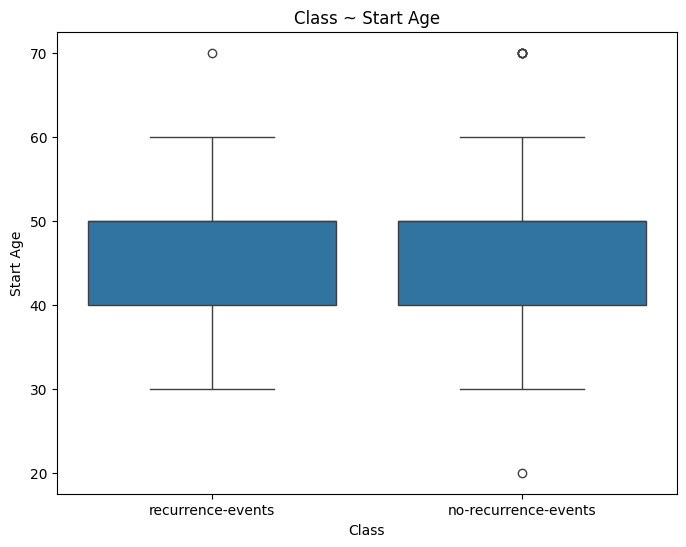

In [31]:
#visualize start age ~ class
plt.figure(figsize = (8,6))
sns.boxplot(data = df, x = 'Class', y = 'Start Age')
plt.title("Class ~ Start Age")
plt.show()

<ipython-input-32-7cb005aab709>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x = 'Class', y = 'End Age', palette = 'Set1')


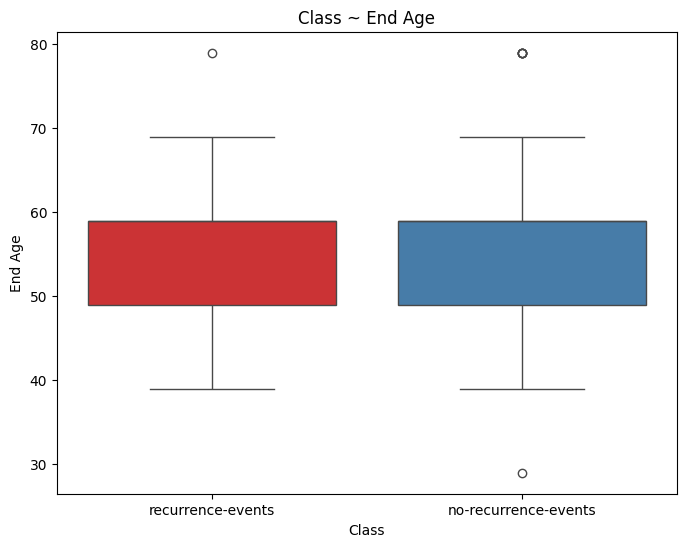

In [32]:
#visualize end age ~ class
plt.figure(figsize = (8,6))
sns.boxplot(data = df, x = 'Class', y = 'End Age', palette = 'Set1')
plt.title("Class ~ End Age")
plt.show()

In [33]:
#group menopause ~ class
menopause_class = df.groupby(['Class', 'menopause']).size().reset_index(name = 'Count')
print(menopause_class)

                  Class menopause  Count
0  no-recurrence-events      ge40     94
1  no-recurrence-events      lt40      5
2  no-recurrence-events   premeno    102
3     recurrence-events      ge40     35
4     recurrence-events      lt40      2
5     recurrence-events   premeno     48


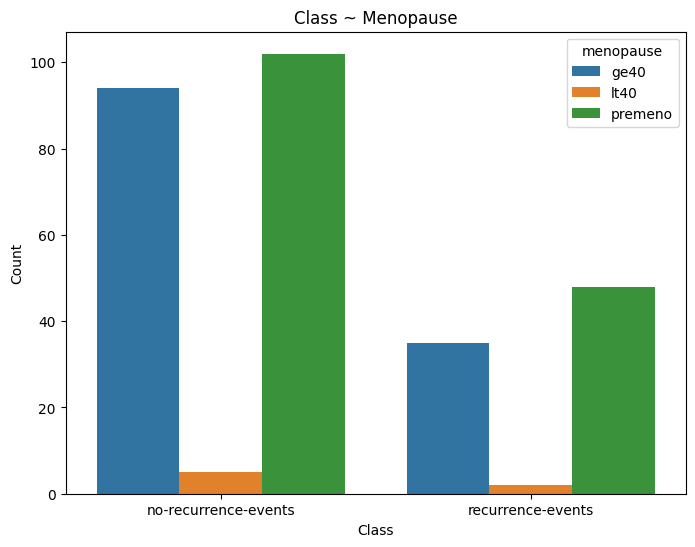

In [34]:
#visualize menopause ~ class
plt.figure(figsize = (8,6))
sns.barplot(x = 'Class', y = 'Count', hue = 'menopause', data = menopause_class)
plt.title("Class ~ Menopause")
plt.show()

<ipython-input-35-0fde2b7eb15d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x = 'Class', y = 'Start tumor size', palette = 'Set2')


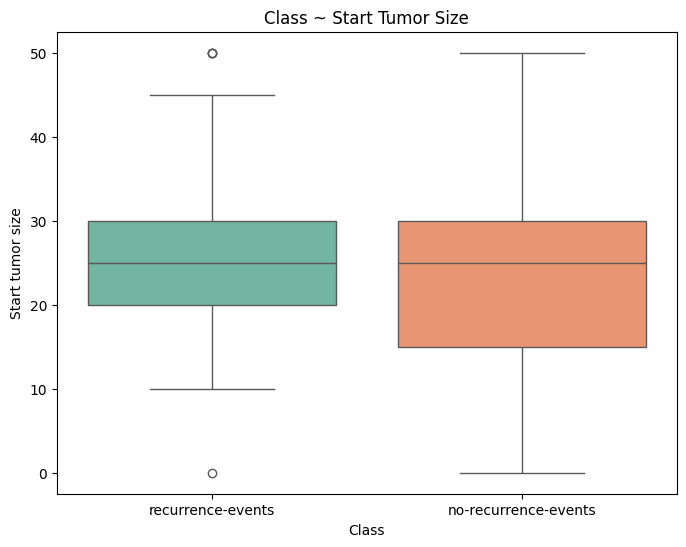

In [35]:
#visualize start tumor size ~ class
plt.figure(figsize = (8,6))
sns.boxplot(data = df, x = 'Class', y = 'Start tumor size', palette = 'Set2')
plt.title("Class ~ Start Tumor Size")
plt.show()

<ipython-input-36-8bb3a01e54fe>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x = 'Class', y = 'End tumor size', palette = 'Set1')


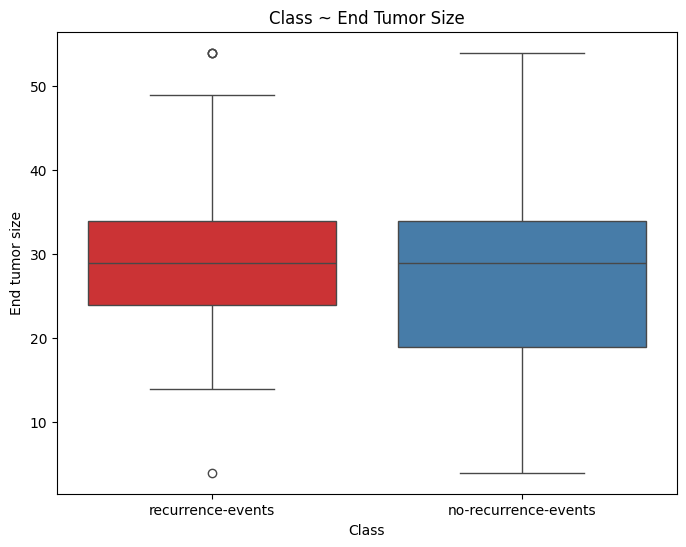

In [36]:
#visualize end tumor size ~ class
plt.figure(figsize = (8,6))
sns.boxplot(data = df, x = 'Class', y = 'End tumor size', palette = 'Set1')
plt.title("Class ~ End Tumor Size")
plt.show()

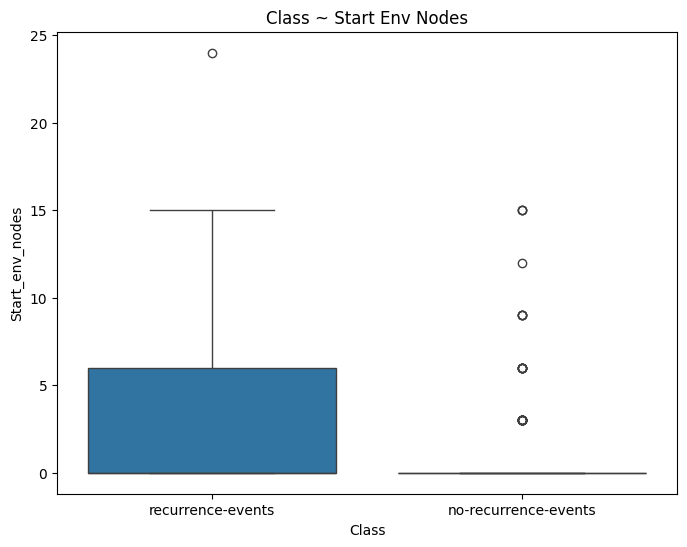

In [37]:
#visualize start env nodes ~ class
plt.figure(figsize = (8,6))
sns.boxplot(data = df, x = 'Class', y = 'Start_env_nodes')
plt.title("Class ~ Start Env Nodes")
plt.show()

<ipython-input-38-cde50ea9cd8c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x = 'Class', y = 'end_env_nodes', palette = 'Set1')


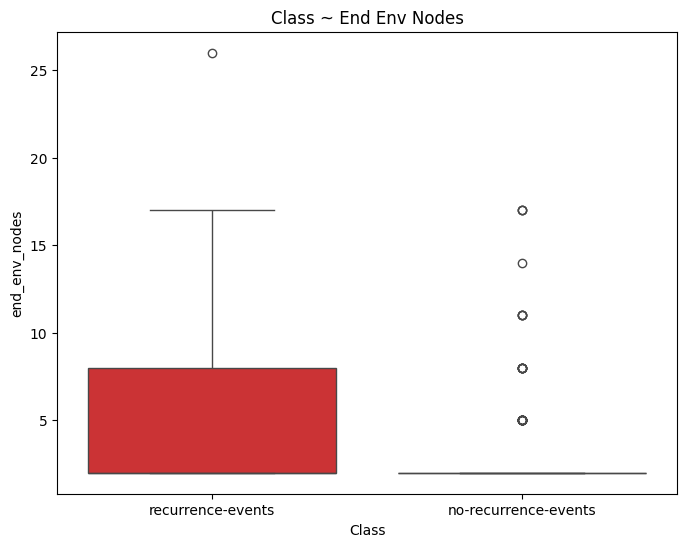

In [38]:
#visualize end env nodes ~ class
plt.figure(figsize = (8,6))
sns.boxplot(data = df, x = 'Class', y = 'end_env_nodes', palette = 'Set1')
plt.title("Class ~ End Env Nodes")
plt.show()

In [39]:
#group node caps & class
node_class = df.groupby(['Class', 'node_caps']).size().reset_index(name = 'Count')
print(node_class)

                  Class node_caps  Count
0  no-recurrence-events        -1      5
1  no-recurrence-events        no    171
2  no-recurrence-events       yes     25
3     recurrence-events        -1      3
4     recurrence-events        no     51
5     recurrence-events       yes     31


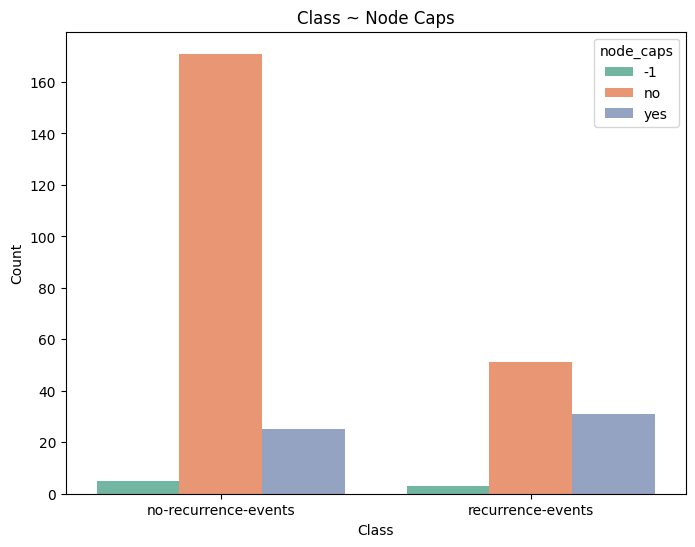

In [40]:
#visualize node caps ~ class
plt.figure(figsize = (8,6))
sns.barplot(x = 'Class', y = 'Count', hue = 'node_caps', data = node_class, palette = 'Set2')
plt.title("Class ~ Node Caps")
plt.show()

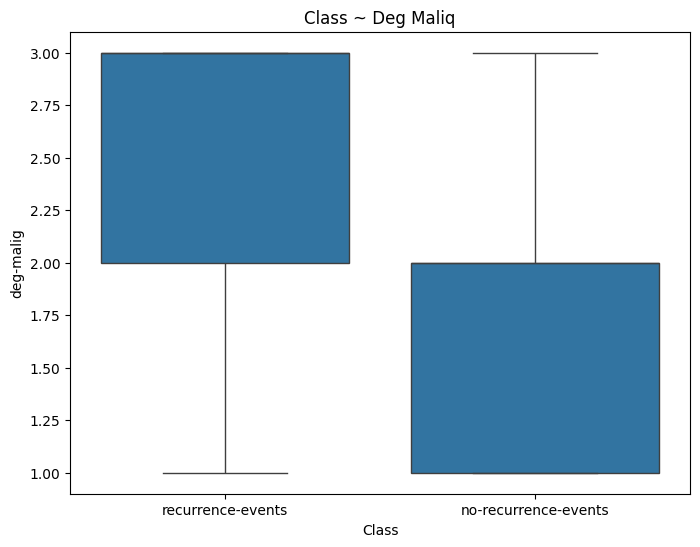

In [41]:
#visualize deg malig ~ class
plt.figure(figsize = (8,6))
sns.boxplot(data = df, x = 'Class', y = 'deg-malig')
plt.title("Class ~ Deg Maliq")
plt.show()

In [42]:
#group breast ~ class
breast_class = df.groupby(['Class', 'breast']).size().reset_index(name = 'Count')
print(breast_class)

                  Class breast  Count
0  no-recurrence-events   left    103
1  no-recurrence-events  right     98
2     recurrence-events   left     49
3     recurrence-events  right     36


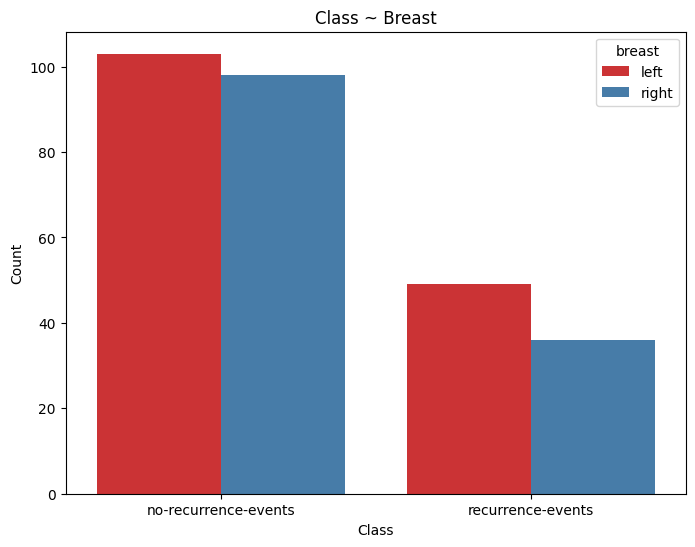

In [43]:
#visualize breast ~ class
plt.figure(figsize = (8,6))
sns.barplot(x = 'Class', y = 'Count', hue = 'breast', data = breast_class, palette = 'Set1')
plt.title("Class ~ Breast")
plt.show()

In [44]:
#group breast quad ~ class
quad_class = df.groupby(['Class', 'breast_quad']).size().reset_index(name = 'Count')
print(quad_class)

                   Class breast_quad  Count
0   no-recurrence-events     central     17
1   no-recurrence-events    left_low     75
2   no-recurrence-events     left_up     71
3   no-recurrence-events   right_low     18
4   no-recurrence-events    right_up     20
5      recurrence-events          -1      1
6      recurrence-events     central      4
7      recurrence-events    left_low     35
8      recurrence-events     left_up     26
9      recurrence-events   right_low      6
10     recurrence-events    right_up     13


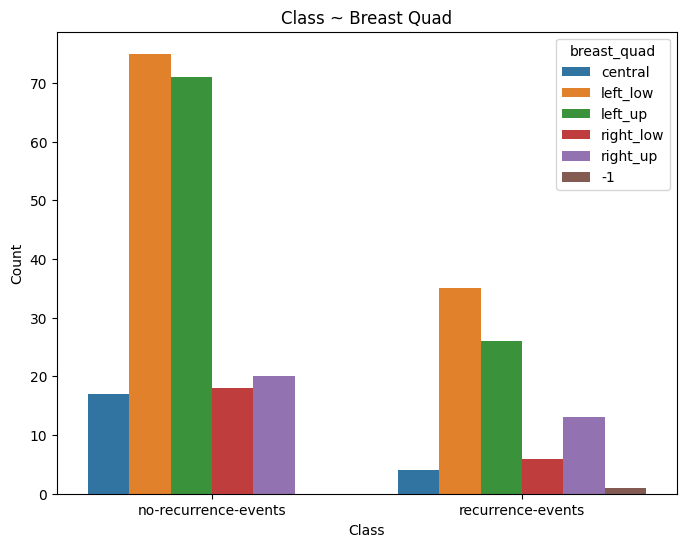

In [45]:
#visualize breast quad ~ class
plt.figure(figsize = (8,6))
sns.barplot(x = 'Class', y = 'Count', hue = 'breast_quad', data = quad_class)
plt.title("Class ~ Breast Quad")
plt.show()

In [46]:
#group irradiat ~ class
irradiat_class = df.groupby(['Class', 'irradiat']).size().reset_index(name = 'Count')
print(irradiat_class)

                  Class irradiat  Count
0  no-recurrence-events       no    164
1  no-recurrence-events      yes     37
2     recurrence-events       no     54
3     recurrence-events      yes     31


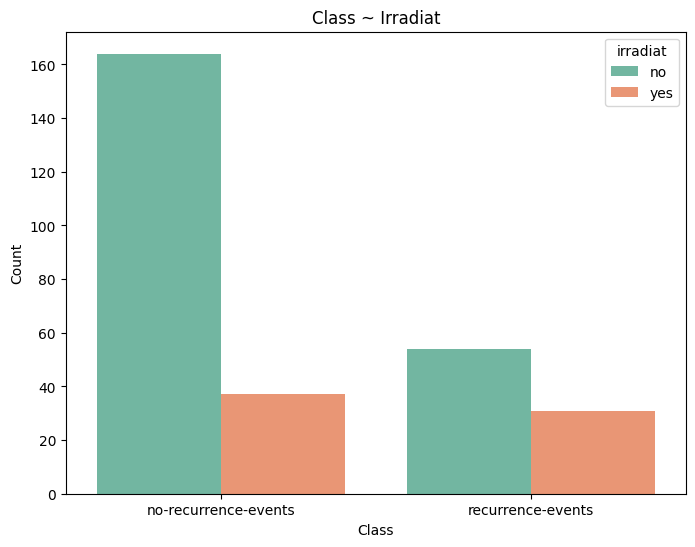

In [47]:
#visualize irradiat ~ class
plt.figure(figsize = (8,6))
sns.barplot(x = 'Class', y = 'Count', hue = 'irradiat', data = irradiat_class, palette = 'Set2')
plt.title("Class ~ Irradiat")
plt.show()

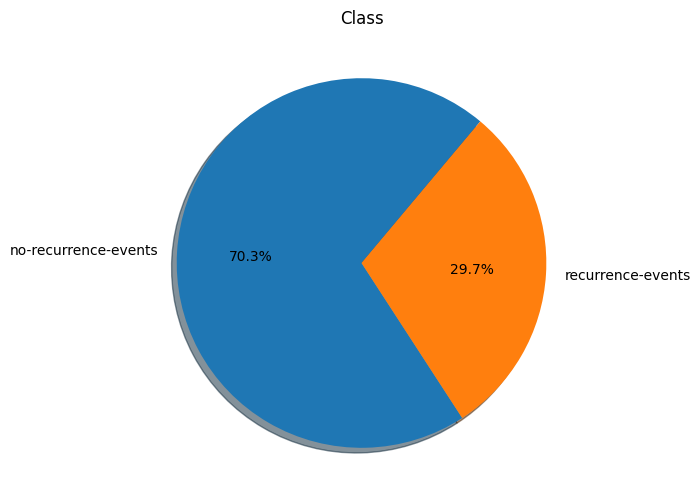

In [48]:
#visualize class
plt.figure(figsize = (8,6))
x = [np.count_nonzero(df['Class'] == 'no-recurrence-events'),
    np.count_nonzero(df['Class'] == 'recurrence-events')]
activities = ['no-recurrence-events', 'recurrence-events']
plt.pie(x, labels = activities, startangle = 50, autopct = '%.1f%%', shadow = True)
plt.title("Class")
plt.show()